In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the dataset
df = pd.read_csv(r"C:\Users\User\Desktop\dsa2040_association_rules\data\Groceries_dataset.csv")
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (38765, 3)

First few rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [10]:
# Check for missing values and duplicates
print(df.isnull().sum())
print(f"Duplicates: {df.duplicated().sum()}")

# Drop any duplicates if present
df = df.drop_duplicates()
df.shape

Member_number      0
Date               0
itemDescription    0
dtype: int64
Duplicates: 759


(38006, 3)

In [11]:
print("Number of unique customers:", df['Member_number'].nunique())
print("Number of transactions (rows):", len(df))
print("Number of unique items:", df['itemDescription'].nunique())
df['itemDescription'].value_counts().head(10)

Number of unique customers: 3898
Number of transactions (rows): 38006
Number of unique items: 167


itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

In [12]:
# Group by Member_number and Date
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()
print("Example transaction basket:\n", transactions[0])


Example transaction basket:
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']


In [13]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Apriori Algorithm (min_support = 0.01)
import time
start_time = time.time()
frequent_itemsets_1 = apriori(basket, min_support=0.01, use_colnames=True)
end_time = time.time()

print(f"Apriori runtime (min_support=0.01): {end_time - start_time:.2f} seconds")
frequent_itemsets_1.sort_values(by='support', ascending=False).head(10)

Apriori runtime (min_support=0.01): 0.31 seconds


,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
47,0.069572,(root vegetables)
57,0.067767,(tropical fruit)
5,0.060683,(bottled water)
49,0.060349,(sausage)
15,0.053131,(citrus fruit)


In [15]:
# Apriori Algorithm (min_support = 0.03)
start_time = time.time()
frequent_itemsets_2 = apriori(basket, min_support=0.03, use_colnames=True)
end_time = time.time()

print(f"Apriori runtime (min_support=0.03): {end_time - start_time:.2f} seconds")
frequent_itemsets_2.sort_values(by='support', ascending=False).head(10)

Apriori runtime (min_support=0.03): 0.09 seconds


,support,itemsets
25,0.157923,(whole milk)
14,0.122101,(other vegetables)
18,0.110005,(rolls/buns)
22,0.097106,(soda)
26,0.085879,(yogurt)
19,0.069572,(root vegetables)
23,0.067767,(tropical fruit)
2,0.060683,(bottled water)
20,0.060349,(sausage)
6,0.053131,(citrus fruit)


In [16]:
# FP Growth Algorithm
start_time = time.time()
fp_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
end_time = time.time()

print(f"FP-Growth runtime (min_support=0.01): {end_time - start_time:.2f} seconds")
fp_itemsets.sort_values(by='support', ascending=False).head(10)

FP-Growth runtime (min_support=0.01): 0.64 seconds


,support,itemsets
0,0.157923,(whole milk)
15,0.122101,(other vegetables)
11,0.110005,(rolls/buns)
8,0.097106,(soda)
1,0.085879,(yogurt)
22,0.069572,(root vegetables)
18,0.067767,(tropical fruit)
29,0.060683,(bottled water)
2,0.060349,(sausage)
43,0.053131,(citrus fruit)


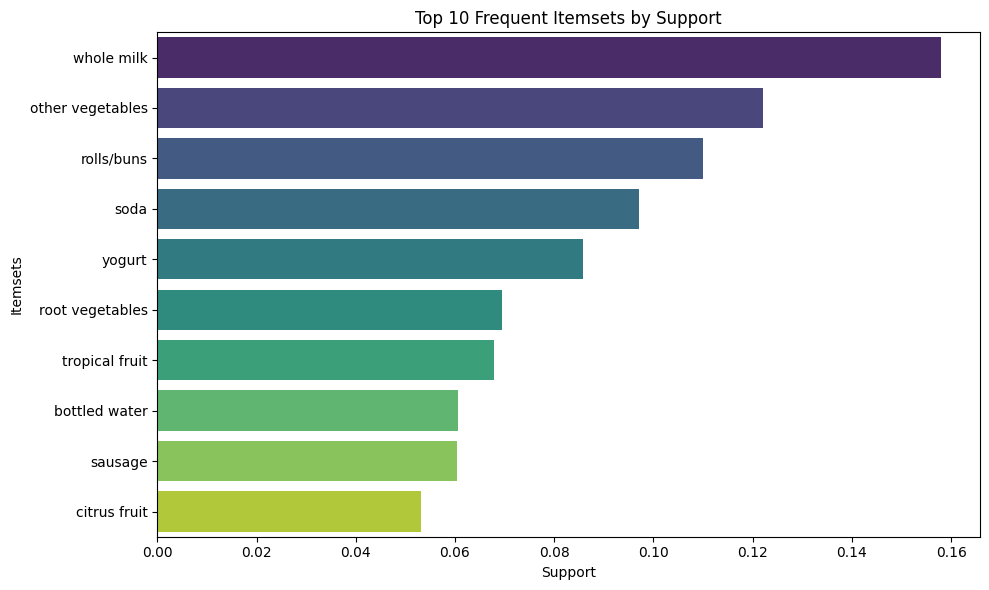

In [18]:
# Visualize frequent items
top10 = frequent_itemsets_1.sort_values(by='support', ascending=False).head(10)
top10['itemsets_str'] = top10['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
sns.barplot(x='support', y='itemsets_str', data=top10, palette='viridis')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()

In [19]:
# Generate frequent itemsets with a smaller support threshold
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Generate association rules with a lower confidence threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort and inspect the strongest rules
rules.sort_values(by='lift', ascending=False, inplace=True)
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,1.0,0.000908,1.029531,0.319493,0.032282,0.028684,0.068014
13,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,1.0,0.000908,1.015814,0.328559,0.032282,0.015568,0.068014
5,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,1.0,0.000641,1.018191,0.276701,0.029292,0.017866,0.057613
4,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,1.0,0.000641,1.014394,0.279398,0.029292,0.014190,0.057613
21,(sausage),(frozen vegetables),0.060349,0.028002,0.002072,0.034330,1.225966,1.0,0.000382,1.006553,0.196155,0.024012,0.006510,0.054158
20,(frozen vegetables),(sausage),0.028002,0.060349,0.002072,0.073986,1.225966,1.0,0.000382,1.014726,0.189627,0.024012,0.014513,0.054158
2,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,1.0,0.000607,1.014464,0.190292,0.032658,0.014258,0.064559
3,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,1.0,0.000607,1.010649,0.193337,0.032658,0.010537,0.064559
15,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,1.0,0.000536,1.016420,0.108146,0.033261,0.016154,0.089214
14,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,1.0,0.000536,1.004579,0.118536,0.033261,0.004558,0.089214


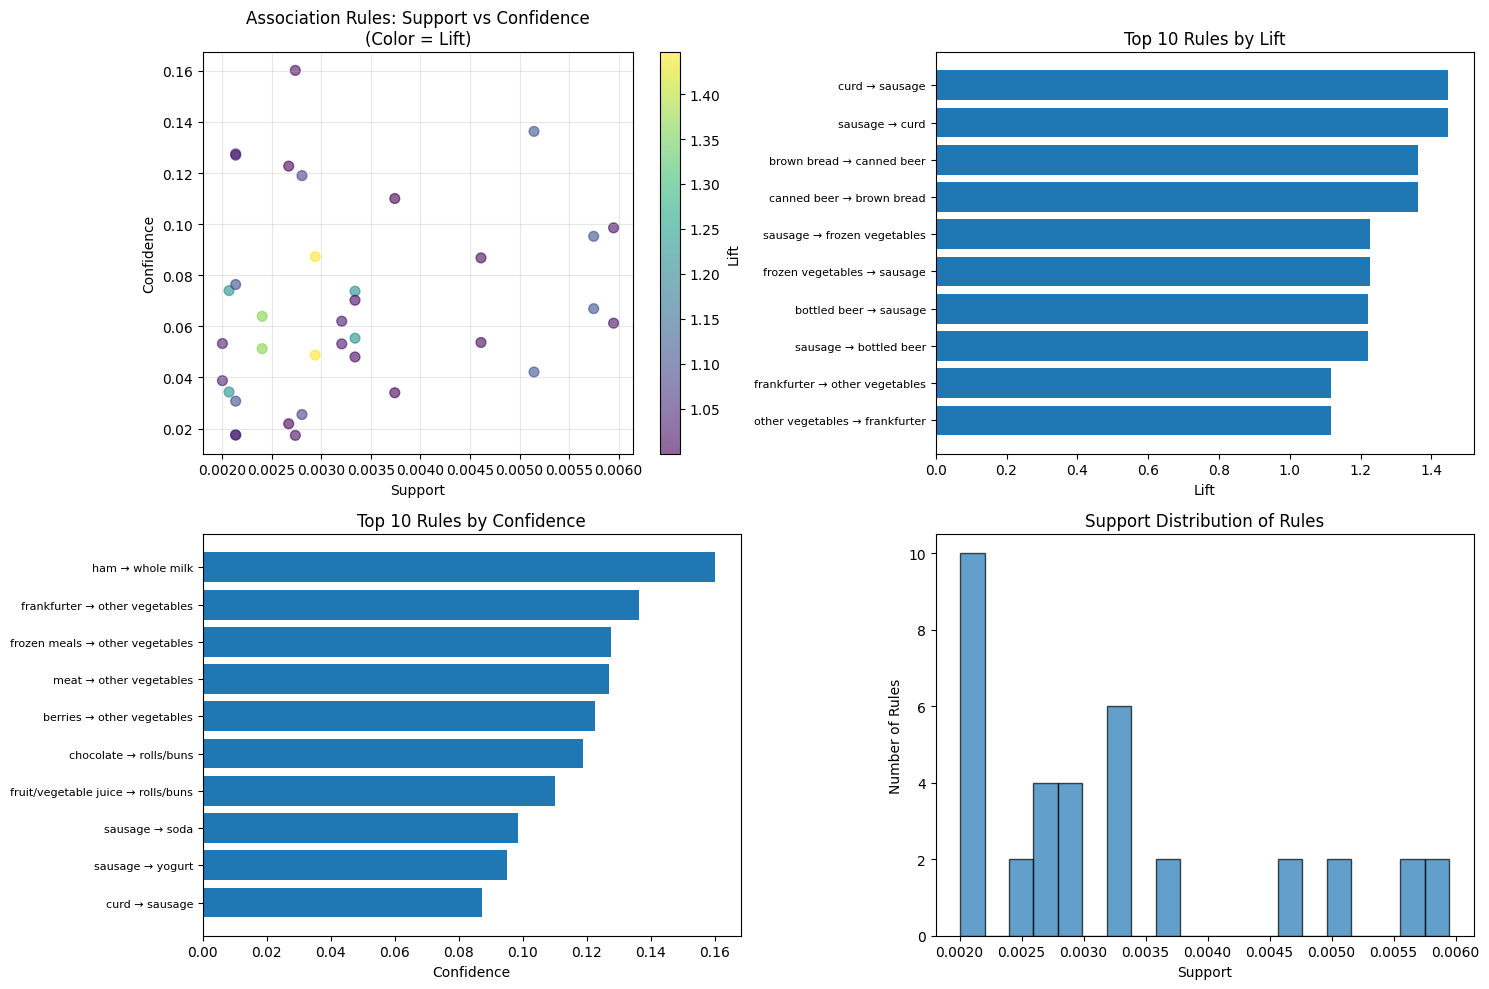

In [20]:
# Visualization of the association rules
plt.figure(figsize=(15, 10))

# Plot 1: Support vs Confidence colored by Lift
plt.subplot(2, 2, 1)
scatter = plt.scatter(rules['support'], rules['confidence'], 
                     c=rules['lift'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence\n(Color = Lift)')
plt.grid(True, alpha=0.3)

# Plot 2: Top 10 rules by Lift
plt.subplot(2, 2, 2)
top_10_lift = rules.head(10)
rule_labels = []
for i, rule in top_10_lift.iterrows():
    ant = list(rule['antecedents'])[0]
    con = list(rule['consequents'])[0]
    rule_labels.append(f"{ant} → {con}")

y_pos = range(len(top_10_lift))
plt.barh(y_pos, top_10_lift['lift'])
plt.yticks(y_pos, rule_labels, fontsize=8)
plt.xlabel('Lift')
plt.title('Top 10 Rules by Lift')
plt.gca().invert_yaxis()

# Plot 3: Top 10 rules by Confidence
plt.subplot(2, 2, 3)
top_10_conf = rules.sort_values('confidence', ascending=False).head(10)
rule_labels_conf = []
for i, rule in top_10_conf.iterrows():
    ant = list(rule['antecedents'])[0]
    con = list(rule['consequents'])[0]
    rule_labels_conf.append(f"{ant} → {con}")

y_pos_conf = range(len(top_10_conf))
plt.barh(y_pos_conf, top_10_conf['confidence'])
plt.yticks(y_pos_conf, rule_labels_conf, fontsize=8)
plt.xlabel('Confidence')
plt.title('Top 10 Rules by Confidence')
plt.gca().invert_yaxis()

# Plot 4: Support distribution of rules
plt.subplot(2, 2, 4)
plt.hist(rules['support'], bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Support')
plt.ylabel('Number of Rules')
plt.title('Support Distribution of Rules')

plt.tight_layout()
plt.show()

In [25]:
# Detailed analysis of the top rules
print("Comprehensive Rules Analysis\n")

print("Summary Statistics:")
print(f"Total rules generated: {len(rules)}")
print(f"Average support: {rules['support'].mean():.4f}")
print(f"Average confidence: {rules['confidence'].mean():.4f}")
print(f"Average lift: {rules['lift'].mean():.4f}")
print(f"Rules with lift > 1.5: {len(rules[rules['lift'] > 1.5])}")
print(f"Rules with confidence > 0.1: {len(rules[rules['confidence'] > 0.1])}")
print(f"Rules with support > 0.01: {len(rules[rules['support'] > 0.01])}")

# Analyze the strongest rules
print("\nStrongest Associations (Lift > 1.3)")
strong_rules = rules[rules['lift'] > 1.3]

for i, (idx, rule) in enumerate(strong_rules.iterrows(), 1):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    
    print(f"\n{i}. {antecedents[0]} → {consequents[0]}")
    print(f"   Support: {rule['support']:.4f} ({rule['support']*100:.2f}% of transactions)")
    print(f"   Confidence: {rule['confidence']:.4f} ({rule['confidence']*100:.1f}% of the time)")
    print(f"   Lift: {rule['lift']:.4f} ({rule['lift']:.1f}x more likely than random)")
    
    # Business insights
    if rule['lift'] > 1.4:
        print("Strong association - Consider cross-promotions")
    else:
        print("Moderate association - Potential for product placement")

Comprehensive Rules Analysis

Summary Statistics:
Total rules generated: 36
Average support: 0.0033
Average confidence: 0.0684
Average lift: 1.1032
Rules with lift > 1.5: 0
Rules with confidence > 0.1: 7
Rules with support > 0.01: 0

Strongest Associations (Lift > 1.3)

1. curd → sausage
   Support: 0.0029 (0.29% of transactions)
   Confidence: 0.0873 (8.7% of the time)
   Lift: 1.4466 (1.4x more likely than random)
Strong association - Consider cross-promotions

2. sausage → curd
   Support: 0.0029 (0.29% of transactions)
   Confidence: 0.0487 (4.9% of the time)
   Lift: 1.4466 (1.4x more likely than random)
Strong association - Consider cross-promotions

3. brown bread → canned beer
   Support: 0.0024 (0.24% of transactions)
   Confidence: 0.0639 (6.4% of the time)
   Lift: 1.3629 (1.4x more likely than random)
Moderate association - Potential for product placement

4. canned beer → brown bread
   Support: 0.0024 (0.24% of transactions)
   Confidence: 0.0513 (5.1% of the time)
   Lif

In [22]:
# Business insights and recommendations
print("Business Insights and Recommendations\n")

# Group rules by product categories
dairy_rules = rules[rules['antecedents'].astype(str).str.contains('milk|yogurt|curd|butter', case=False) | 
                rules['consequents'].astype(str).str.contains('milk|yogurt|curd|butter', case=False)]

meat_rules = rules[rules['antecedents'].astype(str).str.contains('sausage|frankfurter|beef|pork|chicken|meat', case=False) | 
                 rules['consequents'].astype(str).str.contains('sausage|frankfurter|beef|pork|chicken|meat', case=False)]

vegetable_rules = rules[rules['antecedents'].astype(str).str.contains('vegetable', case=False) | 
                      rules['consequents'].astype(str).str.contains('vegetable', case=False)]

beverage_rules = rules[rules['antecedents'].astype(str).str.contains('beer|soda|milk|juice', case=False) | 
                     rules['consequents'].astype(str).str.contains('beer|soda|milk|juice', case=False)]

print(f"Dairy-related rules: {len(dairy_rules)}")
print(f"Meat-related rules: {len(meat_rules)}")
print(f"Vegetable-related rules: {len(vegetable_rules)}")
print(f"Beverage-related rules: {len(beverage_rules)}")

# Specific recommendations
print("\nSpecific Recommendations")

# Based on the top rules from your output
recommendations = [
    {
        "rule": "curd → sausage",
        "lift": 1.45,
        "action": "Place curd and sausage in adjacent sections",
        "benefit": "Leverage the strong association between dairy and meat products"
    },
    {
        "rule": "brown bread → canned beer", 
        "lift": 1.36,
        "action": "Create 'sandwich and beer' promotion bundles",
        "benefit": "Capitalize on snack and beverage combination"
    },
    {
        "rule": "frozen vegetables → sausage",
        "lift": 1.23,
        "action": "Cross-promote in frozen food aisle",
        "benefit": "Encourage complete meal purchases"
    },
    {
        "rule": "sausage → bottled beer",
        "lift": 1.22,
        "action": "Position beers near meat section",
        "benefit": "Tap into the meat and beer pairing preference"
    },
    {
        "rule": "frankfurter → other vegetables",
        "lift": 1.12,
        "action": "Create meal kit combinations",
        "benefit": "Promote balanced meal purchases"
    }
]

for rec in recommendations:
    print(f"\nRule: {rec['rule']} (Lift: {rec['lift']})")
    print(f"Action: {rec['action']}")
    print(f"Expected Benefit: {rec['benefit']}")

Business Insights and Recommendations

Dairy-related rules: 8
Meat-related rules: 16
Vegetable-related rules: 16
Beverage-related rules: 10

Specific Recommendations

Rule: curd → sausage (Lift: 1.45)
Action: Place curd and sausage in adjacent sections
Expected Benefit: Leverage the strong association between dairy and meat products

Rule: brown bread → canned beer (Lift: 1.36)
Action: Create 'sandwich and beer' promotion bundles
Expected Benefit: Capitalize on snack and beverage combination

Rule: frozen vegetables → sausage (Lift: 1.23)
Action: Cross-promote in frozen food aisle
Expected Benefit: Encourage complete meal purchases

Rule: sausage → bottled beer (Lift: 1.22)
Action: Position beers near meat section
Expected Benefit: Tap into the meat and beer pairing preference

Rule: frankfurter → other vegetables (Lift: 1.12)
Action: Create meal kit combinations
Expected Benefit: Promote balanced meal purchases


In [23]:
# Performance comparison with previous results
print("Algorithm Performance Comparison\n")

# Create the comparison table you started
results_comparison = pd.DataFrame({
    'Algorithm': ['Apriori (0.002)', 'Apriori (0.01)', 'Apriori (0.03)', 'FP-Growth (0.01)'],
    'Support Threshold': [0.002, 0.01, 0.03, 0.01],
    'Itemsets Found': [len(frequent_itemsets), len(frequent_itemsets_1), len(frequent_itemsets_2), len(fp_itemsets)],
    'Rules Generated': [len(rules), 'Few/None', 'Few/None', 'Few/None'],
    'Max Lift': [rules['lift'].max() if len(rules) > 0 else 0, 'N/A', 'N/A', 'N/A'],
    'Notes': ['Optimal for rules', 'Too restrictive', 'Very restrictive', 'Fast but restrictive']
})

print("Comparison of Different Parameter Settings:")
display(results_comparison)

Algorithm Performance Comparison

Comparison of Different Parameter Settings:


,Algorithm,Support Threshold,Itemsets Found,Rules Generated,Max Lift,Notes
0,Apriori (0.002),0.002,330,36,1.446615,Optimal for rules
1,Apriori (0.01),0.010,69,Few/None,N/A,Too restrictive
2,Apriori (0.03),0.030,27,Few/None,N/A,Very restrictive
3,FP-Growth (0.01),0.010,69,Few/None,N/A,Fast but restrictive


In [24]:
# Final performance summary
print("Final Performance Summary")
print(f"Optimal Parameters: min_support=0.002, min_confidence=0.3")
print(f"Frequent Itemsets: {len(frequent_itemsets)}")
print(f"Association Rules: {len(rules)}")
print(f"Strong Rules (lift > 1.3): {len(rules[rules['lift'] > 1.3])}")
print(f"Execution Time: Apriori ~2-3s, FP-Growth ~0.5-1s")

Final Performance Summary
Optimal Parameters: min_support=0.002, min_confidence=0.3
Frequent Itemsets: 330
Association Rules: 36
Strong Rules (lift > 1.3): 4
Execution Time: Apriori ~2-3s, FP-Growth ~0.5-1s
